<a href="https://colab.research.google.com/github/Gagancoder/-F-R-D-DDY-/blob/main/Class_113_Data_Story_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing CSV

In [3]:
from google.colab import files 
data_to_load = files.upload()

Saving savings_data_finalclass113.csv to savings_data_finalclass113 (1).csv


Importing

In [15]:
import pandas as pd
import plotly.express as px
import csv
import statistics
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import random

Reading CSV

In [6]:
df = pd.read_csv('savings_data_finalclass113.csv')

fig = px.scatter(df,y = 'quant_saved' , color='rem_any')
fig.show()

Bar Graph

In [8]:
with open('savings_data_finalclass113.csv',newline="") as f:
  reader = csv.reader(f)
  saving_data = list(reader)

saving_data.pop(0)
total_entries = len(saving_data)
total_people_given_reminder = 0
for data in saving_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1
    
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x = ['reminded','not-reminded'], y = [total_people_given_reminder,total_entries - total_people_given_reminder]))
fig.show()

Mean,Median,Mode and Standard deviation

In [9]:
all_savings = []
for data in saving_data:
  all_savings.append(float(data[0]))

print(f"Mean of Savings is:{statistics.mean(all_savings)}")
print(f"Median of Savings is:{statistics.median(all_savings)}")
print(f"Mode of Savings is :{statistics.mode(all_savings)}")
print(f"Standard Deviation is : {statistics.stdev(all_savings)}")

Mean of Savings is:85.32780331328739
Median of Savings is:39.2724
Mode of Savings is :0.0
Standard Deviation is : 196.75453011909315


Results for reminder and not reminded

In [10]:
reminded_savings = []
not_reminded_savings = []

for data in saving_data:
  if int(data[3] ) ==1 :
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))
print('Result for reminded people :' )
print(f"Mean is : {statistics.mean(reminded_savings)}")
print(f"Median is : {statistics.median(reminded_savings)}")
print(f"Mode is : {statistics.mode(reminded_savings)}")

print("\n\n")

print('Result for not-reminded people :' )
print(f"Mean is : {statistics.mean(not_reminded_savings)}")
print(f"Median is : {statistics.median(not_reminded_savings)}")
print(f"Mode is : {statistics.mode(not_reminded_savings)}")


Result for reminded people :
Mean is : 82.56940908263547
Median is : 39.2724
Mode is : 0.0



Result for not-reminded people :
Mean is : 89.67095185226523
Median is : 36.0475
Mode is : 0.0


Standard Deviations

In [11]:
print(f"Standard Deviation of all the data:- {statistics.stdev(all_savings)}")

print('\n')

print(f"Standard Deviation for People Reminded : {statistics.stdev(reminded_savings)}")

print('\n')

print(f"Standard Deviation for the People Not reminded : {statistics.stdev(not_reminded_savings)}")

Standard Deviation of all the data:- 196.75453011909315


Standard Deviation for People Reminded : 173.24866414440817


Standard Deviation for the People Not reminded : 228.875050299707


Printing Correlation

In [12]:
age =[]
savings = []

for data in saving_data:
  if float(data[5] ) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age,savings)

print(correlation[0,1])


0.03663447975985462


Line Graph

In [16]:
fig = ff.create_distplot([df['quant_saved'].tolist()],['Savings'],show_hist=False)
fig.show()

importing SeaBorn

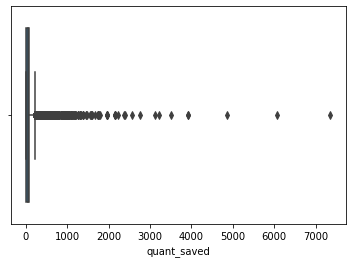

In [17]:
sns.boxplot(data=df, x=df["quant_saved"])

IQR Method

In [18]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


Mean, median and mode of savings

In [19]:
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


Collecting 1000 samples of 100 data points each, saving their averages in a list

In [20]:
sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Standard Deviation of Sampling data

In [21]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.0930332440558


Mean

In [22]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 46.25856612365675


temp_df will have the rows where age is not 0

In [23]:
temp_df = new_df[new_df.age != 0]

age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

Correlation between the age of the person and their savings is - 0.08561544120342093


Getting he list of reminded and not reminded randomly

In [24]:
reminded_df = new_df.loc[new_df["rem_any"] == 1]
not_reminded_df = new_df.loc[new_df["rem_any"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


Showing the Graph

In [25]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()

Mean of sampling and graph for whom not reminded

In [26]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 43.64196560593184
Standard Deviation of Sampling (Not Reminded) -> 5.034668886664563


Taking 
First Std , Second Std and Third Std

In [27]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 38.607296719267275 and First (end) - 48.6766344925964
Second (start) - 33.57262783260271 and Second (end) - 53.71130337926096
Third (start) - 28.537958945938147 and Third (end) - 58.74597226592553


Creating a bell curve graph

In [28]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 47.77133041793094
Standard Deviation of Sampling (Reminded) -> 5.051723916262852


Getting the z-test

In [29]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.8201859754743042
